In [1]:
import torch
import import_ipynb
import gibbs_sampler
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
gibbs  = gibbs_sampler.gibbs_sampler() 

importing Jupyter notebook from gibbs_sampler.ipynb


In [2]:
mu1=torch.tensor(0)
var1=torch.tensor(0)
mu2=torch.tensor(0)
var2=torch.tensor(0)



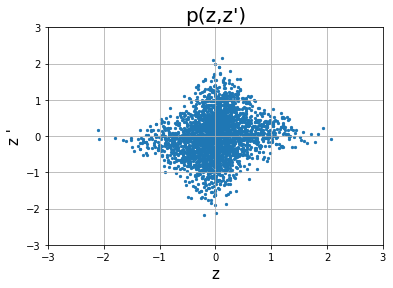

In [3]:
G,z1,z2,z1_prior,z2_prior = gibbs.calc(mu1,var1,mu2,var2)
z1_prior=z1_prior.cpu().detach().numpy()
z2_prior=z2_prior.cpu().detach().numpy()
x_val =[]
y_val =[]
#p(z,z') Gibbs sampling
for i in np.arange(20):
    G,z1,z2,z1_prior,z2_prior = gibbs.calc(mu1,var1,mu2,var2)
    z1_prior=z1_prior.cpu().detach().numpy()
    z2_prior=z2_prior.cpu().detach().numpy()
    z1_prior=z1_prior.squeeze()
    z2_prior=z2_prior.squeeze()
    x_val=np.hstack((x_val,z1_prior))
    y_val=np.hstack((y_val,z2_prior))
plt.scatter(x_val,y_val,s=5)
plt.xlabel('z',fontsize=15)
plt.ylabel('z \'',fontsize=15)
plt.title('p(z,z\')',fontsize=20)
plt.xlim([-3, 3])
plt.ylim([-3, 3])

plt.grid()
plt.show()

In [4]:
## Numerica integration of prior
g11=G[0,0].cpu().detach().numpy()
g11=float(g11)
g22=G[1,1].cpu().detach().numpy()
g22=float(g22)
f = lambda y, x: np.exp(-x**2 - y**2+g11*x*y-np.exp(g22)*(x**2)*(y**2))
val, err=integrate.dblquad(f, -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)

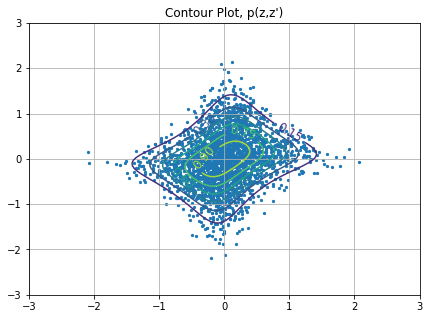

In [5]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
zlist = np.ndarray((100,100))
for x in range(0, len(xlist)):
    for y in range(0, len(ylist)):
        zlist[x][y] = np.exp(-xlist[x]**2 - ylist[y]**2+g11*xlist[x]*ylist[y]-np.exp(g22)*(xlist[x]**2)*(ylist[y]**2))
plt.figure(figsize=(7, 5))
plt.title('Contour Plot, p(z,z\')')
contours = plt.contour(xlist, ylist, zlist)
plt.scatter(x_val,y_val,s=5)
plt.clabel(contours,inline=1,  fontsize=12)
plt.grid()
plt.show()

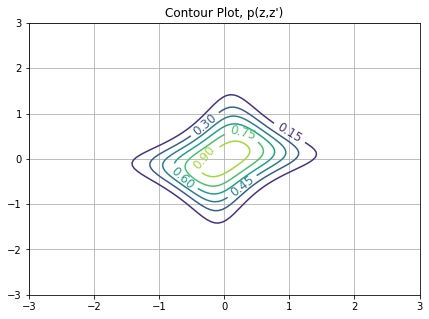

In [6]:
plt.figure(figsize=(7, 5))
plt.title('Contour Plot, p(z,z\')')
contours = plt.contour(xlist, ylist, zlist)
plt.clabel(contours,inline=1,  fontsize=12)
plt.grid()
plt.show()

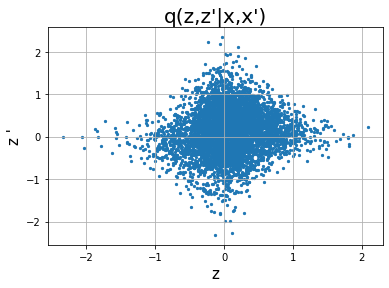

In [18]:
#q(z,z'|x,x')
mu1=torch.tensor(1)
var1=torch.tensor(1)
mu2=torch.tensor(1)
var2=torch.tensor(1)
for i in np.arange(20):
    G,z1,z2,z1_prior,z2_prior = gibbs.calc(mu1,var1,mu2,var2)
    z1=z1.cpu().detach().numpy()
    z2=z2.cpu().detach().numpy()
    z1=z1.squeeze()
    z2=z2.squeeze()
    x_val=np.hstack((x_val,z1))
    y_val=np.hstack((y_val,z2))
plt.scatter(x_val,y_val,s=5)
plt.xlabel('z',fontsize=15)
plt.ylabel('z \'',fontsize=15)
plt.title('q(z,z\'|x,x\')',fontsize=20)
plt.grid()
plt.show()


In [8]:
## Numerica integration of posterior
g11=G[0,0].cpu().detach().numpy()
g11=float(g11)
g22=G[1,1].cpu().detach().numpy()
g22=float(g22)
f1 = lambda y, x: np.exp(-x**2 - y**2+g11*x*y-np.exp(g22)*(x**2)*(y**2)+(mu1*x-np.exp(var1)*x**2)+(mu2*y-np.exp(var2)*y**2))
val, err=integrate.dblquad(f1, -np.inf, np.inf, lambda x: -np.inf, lambda x: np.inf)

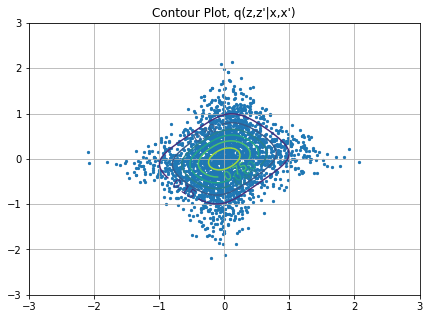

In [9]:
xlist = np.linspace(-3.0, 3.0, 100)
ylist = np.linspace(-3.0, 3.0, 100)
zlist = np.ndarray((100,100))
for x in range(0, len(xlist)):
    for y in range(0, len(ylist)):
        zlist[x][y] = np.exp(-xlist[x]**2 - ylist[y]**2+g11*xlist[x]*ylist[y]-np.exp(g22)*(xlist[x]**2)*(ylist[y]**2)+(mu1*xlist[x]-np.exp(var1)*xlist[x]**2)+(mu2*ylist[y]-np.exp(var2)*ylist[y]**2))
plt.figure(figsize=(7, 5))
plt.title('Contour Plot, q(z,z\'|x,x\')')
contours = plt.contour(xlist, ylist, zlist)
plt.scatter(x_val,y_val,s=5)
plt.clabel(contours,inline=1,  fontsize=12)
plt.grid()
plt.show()

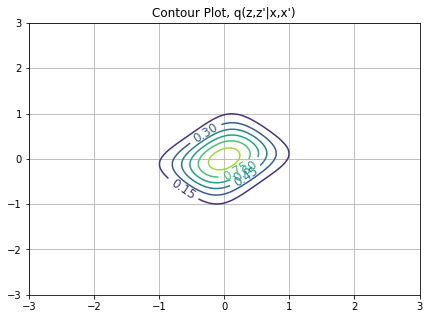

In [10]:
plt.figure(figsize=(7, 5))
plt.title('Contour Plot, q(z,z\'|x,x\')')
contours = plt.contour(xlist, ylist, zlist)
plt.clabel(contours,inline=1,  fontsize=12)
plt.grid()
plt.show()